Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [59]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility


print(type(X),X.shape)
print(type(y_true),y_true.shape)

k = 5
true_centers = np.array([X[y_true == i].mean(axis=0) for i in range(k)])
print(true_centers)
center_variance = true_centers.var(axis=0)
print(center_variance)

X = StandardScaler().fit_transform(X)

theo_in = sum(1000*1.5**2/(center_variance+1.5**2))
print(theo_in)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)
[[ -1.61420338   4.57265582 -10.08156966  -4.04102655  -6.9675822
   -8.00419644  -6.1503875   -3.12054799  -2.03008904   0.81035899]
 [ -1.72809588   3.84638785  -6.00757693   7.53501651  -9.27782347
    3.33771796  -1.63584575   1.17373974  -7.23474581  -6.03213699]
 [  6.07228515   9.32809101  -3.69571573   3.70377867   7.50272694
    7.94359138  -8.1738286   -9.22840828  -6.53852603   7.54362052]
 [ -7.92957013  -1.53092109   9.18966467   0.75810567   3.7817487
   -3.75841318   3.72552357   6.4251848   -9.72283851   4.98900567]
 [  9.69778782   5.12558214  -4.36025825   5.80138774  -7.84369724
   -0.95261712   8.22288381  -4.15748977  -4.20083432  -7.30267819]]
[39.06860374 12.04760504 42.02319976 16.64054358 46.78992707 30.58601821
 37.11828026 27.79558745  6.93128442 34.43376837]
934.5928213915947


In [60]:
# Inertia
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)
kmeans.fit(X)
print("Inertia:", kmeans.inertia_)



Inertia: 924.3159961688092


In [62]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment


cm = confusion_matrix(y_true, y_pred)
row_ind, col_ind = linear_sum_assignment(-cm)
mapping = dict(zip(col_ind, row_ind))
y_pred_aligned = np.array([mapping[label] for label in y_pred])


cm_aligned = confusion_matrix(y_true, y_pred_aligned)
print("Confusion matrix:\n", cm_aligned)

Confusion matrix:
 [[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   0 200   0   0]
 [  0   0   0 200   0]
 [  0   0   0   0 200]]


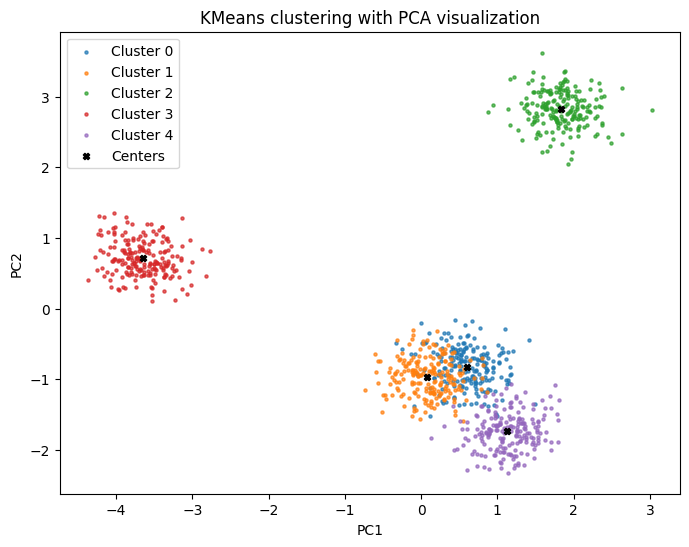

In [64]:
# 2D Visaulization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

y_pred = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.scatter(
        X_pca[y_pred_aligned == i, 0], X_pca[y_pred_aligned == i, 1],
        label=f"Cluster {i}", alpha=0.7, s = 5
    )


plt.scatter(
    centers_pca[:, 0], centers_pca[:, 1],
    c="black", marker="X", s=20, label="Centers"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans clustering with PCA visualization")
plt.legend()
plt.show()

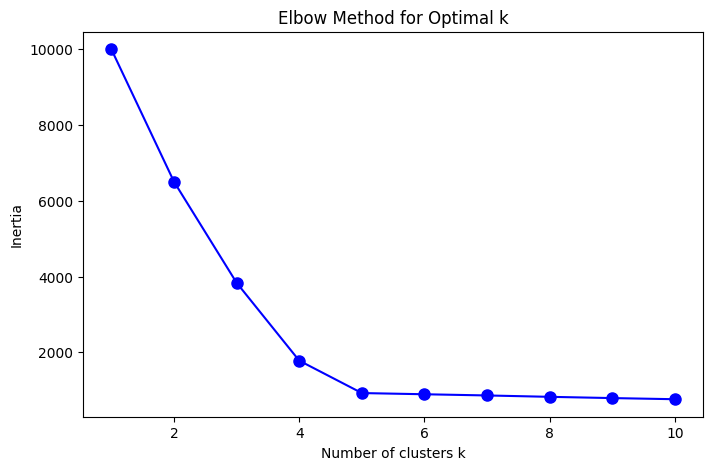

In [5]:
# elbow analysis

inertia_list = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_list, 'bo-', markersize=8)
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# 2. Clustering Fashion-MNIST using $k$-means

In [12]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)
X = X.astype(np.float64)
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [25]:
label_counts = np.bincount(y)

for i, count in enumerate(label_counts):
    print(f"Label {i}: {count} samples")

Label 0: 7000 samples
Label 1: 7000 samples
Label 2: 7000 samples
Label 3: 7000 samples
Label 4: 7000 samples
Label 5: 7000 samples
Label 6: 7000 samples
Label 7: 7000 samples
Label 8: 7000 samples
Label 9: 7000 samples


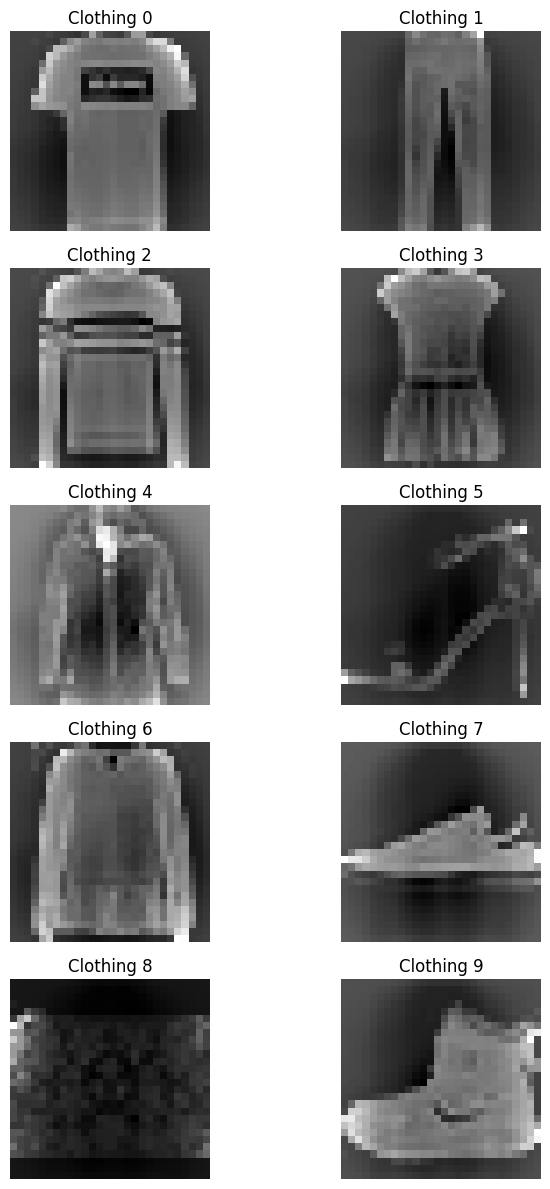

In [26]:
# plot each type of clothing
fig, axes = plt.subplots(5, 2, figsize=(8, 12))

for i in range(10):
    ax = axes[i//2, i%2]
    img_idx = np.where(y == i)[0][0]
    ax.imshow(X[img_idx].reshape(28,28), cmap='gray')
    ax.set_title(f"Clothing {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

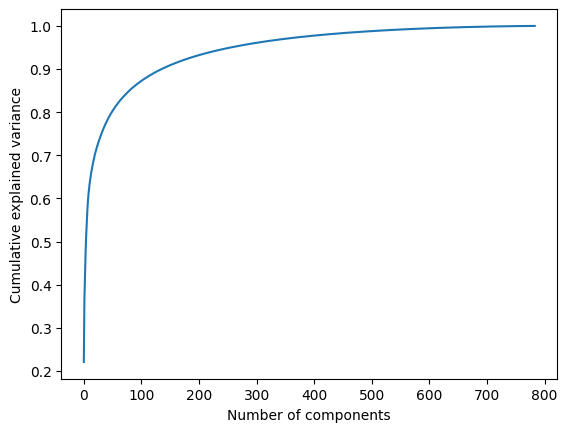

In [13]:
# PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

X_pca = pca.fit_transform(X)

In [28]:
# Choose n_comp
target_ratios = np.linspace(0.80, 0.95, 16)
n_components_list = []

for r in target_ratios:
    n = np.argmax(cumulative_variance >= r) + 1
    n_components_list.append(n)

print(n_components_list)

[np.int64(50), np.int64(55), np.int64(60), np.int64(66), np.int64(73), np.int64(81), np.int64(89), np.int64(99), np.int64(110), np.int64(122), np.int64(137), np.int64(153), np.int64(173), np.int64(196), np.int64(223), np.int64(256)]


In [29]:
# Choose n
from sklearn.metrics import adjusted_rand_score
rng = np.random.default_rng(42)

sample_size = 7000
n_runs = 10

ari_means, ari_stds = [], []

for n in n_components_list:
    X_sub = X_pca[:, :n]
    ari_scores = []

    for _ in range(n_runs):
        if X_sub.shape[0] > sample_size:
            idx = rng.choice(X_sub.shape[0], size=sample_size, replace=False)
            X_sample = X_sub[idx]
            y_sample = y[idx]
        else:
            X_sample = X_sub
            y_sample = y

        # KMeans
        kmeans = KMeans(n_clusters=10, n_init=10, random_state=None)
        y_pred = kmeans.fit_predict(X_sample)
        ari_scores.append(adjusted_rand_score(y_sample, y_pred))

    ari_means.append(np.mean(ari_scores))
    ari_stds.append(np.std(ari_scores))


In [30]:
for n, mean, std in zip(n_components_list, ari_means, ari_stds):
    print(f"n_components={n}, ARI mean={mean:.4f}, std={std:.4f}")

n_components=50, ARI mean=0.3533, std=0.0080
n_components=55, ARI mean=0.3337, std=0.0062
n_components=60, ARI mean=0.3383, std=0.0068
n_components=66, ARI mean=0.3441, std=0.0094
n_components=73, ARI mean=0.3328, std=0.0105
n_components=81, ARI mean=0.3470, std=0.0096
n_components=89, ARI mean=0.3405, std=0.0114
n_components=99, ARI mean=0.3398, std=0.0171
n_components=110, ARI mean=0.3374, std=0.0080
n_components=122, ARI mean=0.3420, std=0.0122
n_components=137, ARI mean=0.3428, std=0.0089
n_components=153, ARI mean=0.3395, std=0.0144
n_components=173, ARI mean=0.3430, std=0.0112
n_components=196, ARI mean=0.3443, std=0.0135
n_components=223, ARI mean=0.3476, std=0.0162
n_components=256, ARI mean=0.3501, std=0.0115


In [14]:
# Choose n = 50! 80%
from sklearn.cluster import KMeans
X_reduced = pca.transform(X)[:, :50]

kmeans = KMeans(n_clusters=10, n_init= 10)
kmeans.fit(X_reduced)

y_pred = kmeans.fit_predict(X_reduced)


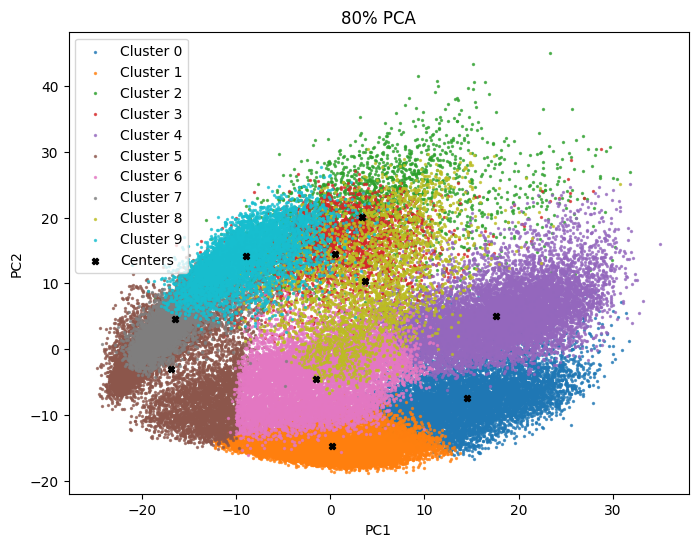

In [15]:
# alignment
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
cm = confusion_matrix(y, y_pred)
row_ind, col_ind = linear_sum_assignment(-cm)
mapping = dict(zip(col_ind, row_ind))
y_pred_aligned = np.array([mapping[label] for label in y_pred])


plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(
        X_reduced[y_pred_aligned == i, 0], X_reduced[y_pred_aligned == i, 1],
        label=f"Cluster {i}", alpha=0.7, s = 2
    )


plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    c="black", marker="X", s=20, label="Centers"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("80% PCA")
plt.legend()
plt.show()

Confusion matrix:
 [[4032  213   57    2  140  574 1950    4   28    0]
 [ 261 6313    5    0   65  166  189    0    1    0]
 [ 156   13   33    1 4103  537 2080    4   72    1]
 [1868 3720    1    0   49  548  808    0    5    1]
 [1063  211    7    0 4138  289 1233    0   59    0]
 [   1    2    0  287    0 4591   48 1588   12  471]
 [1293   68  101    3 2191  847 2446    8   41    2]
 [   0    0    0   17    0  645    0 5593    0  745]
 [  47   20 2476   28  166  444  607  355 2695  162]
 [   9    4    1 2354    3  196   60  291    0 4082]]
Number of successful predictions:  33923
ARI:  0.34859172009573236
Class 0 accuracy: 0.5760
Class 1 accuracy: 0.9019
Class 2 accuracy: 0.0047
Class 3 accuracy: 0.0000
Class 4 accuracy: 0.5911
Class 5 accuracy: 0.6559
Class 6 accuracy: 0.3494
Class 7 accuracy: 0.7990
Class 8 accuracy: 0.3850
Class 9 accuracy: 0.5831


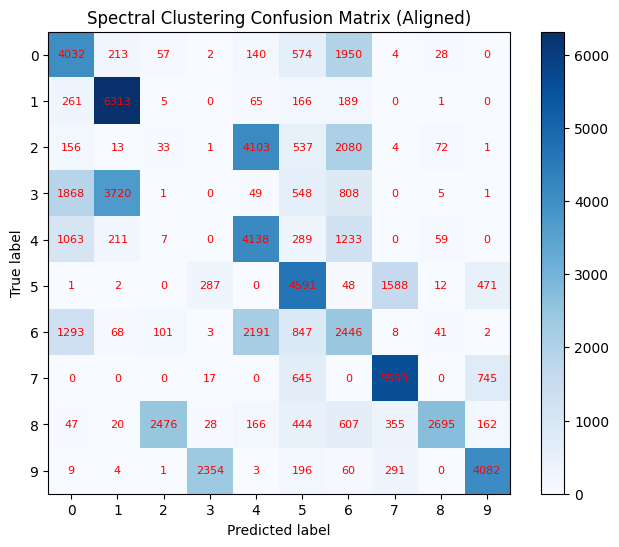

In [17]:
from sklearn.metrics import adjusted_rand_score
cm_aligned = confusion_matrix(y, y_pred_aligned)
print("Confusion matrix:\n", cm_aligned)
print("Number of successful predictions: ", np.trace(cm_aligned))
ari = adjusted_rand_score(y, y_pred)
print("ARI: ", ari)

class_accuracy = np.diag(cm_aligned) / np.sum(cm_aligned, axis=1)
for i, acc in enumerate(class_accuracy):
    print(f"Class {i} accuracy: {acc:.4f}")

plt.figure(figsize=(8,6))
plt.imshow(cm_aligned, cmap='Blues')
plt.colorbar()
plt.title("Spectral Clustering Confusion Matrix (Aligned)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(range(10))
plt.yticks(range(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, cm_aligned[i, j], ha='center', va='center', color='red', fontsize=8)
plt.show()

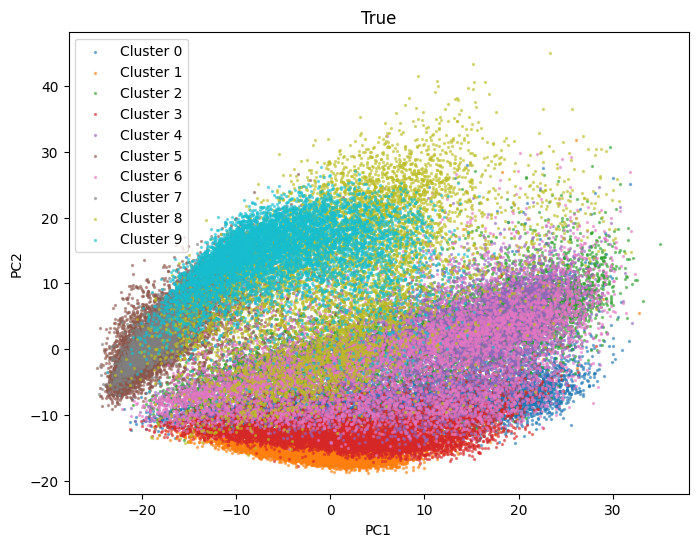

In [37]:
# Real distribution
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1],
        label=f"Cluster {i}", alpha=0.5, s = 2
    )


plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("True")
plt.legend()
plt.show()

# 3. Dimensionality reduction for Fashion-MNIST

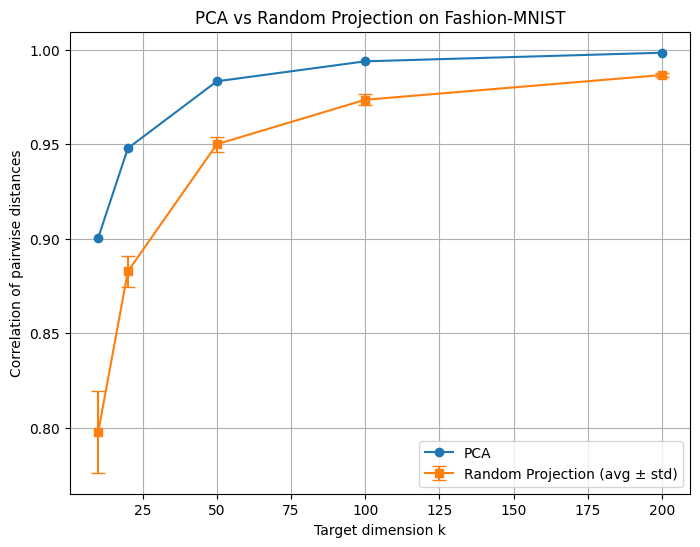

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.datasets import fetch_openml
from scipy.stats import pearsonr

X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)
X = X.astype(np.float64)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

np.random.seed(42)
subset_idx = np.random.choice(X_scaled.shape[0], size=7000, replace=False)
X_sub = X_scaled[subset_idx]

D_orig = pairwise_distances(X_sub)

dims = [10, 20, 50, 100, 200]
n_seeds = 10

corr_pca = []
corr_rp_mean = []
corr_rp_std = []

pca = PCA()
X_pca = pca.fit_transform(X_sub)

for k in dims:

    X_reduced = X_pca[:, :k]
    D_pca = pairwise_distances(X_reduced)
    corr_pca.append(pearsonr(D_orig.ravel(), D_pca.ravel())[0])

    corrs = []
    for seed in range(n_seeds):
        rp = GaussianRandomProjection(n_components=k, random_state=seed)
        X_rp = rp.fit_transform(X_sub)
        D_rp = pairwise_distances(X_rp)
        corr, _ = pearsonr(D_orig.ravel(), D_rp.ravel())
        corrs.append(corr)
    corr_rp_mean.append(np.mean(corrs))
    corr_rp_std.append(np.std(corrs))

plt.figure(figsize=(8,6))
plt.plot(dims, corr_pca, marker='o', label="PCA")
plt.errorbar(dims, corr_rp_mean, yerr=corr_rp_std, fmt='s-', capsize=5, label="Random Projection (avg ± std)")
plt.xlabel("Target dimension k")
plt.ylabel("Correlation of pairwise distances")
plt.title("PCA vs Random Projection on Fashion-MNIST")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
print(D_pca.shape)

(2000, 2000)


# 4. Clustering Fashion-MNIST using spectral clustering

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from scipy.optimize import linear_sum_assignment

X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)
X = X.astype(np.float64)
y = y.astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

np.random.seed(42)
subset_idx = np.random.choice(X_scaled.shape[0], size=10000, replace=False)
X_sub = X_scaled[subset_idx]
y_sub = y[subset_idx]

pca = PCA(n_components=137)
X_reduced = pca.fit_transform(X_sub)


k=  5 | ARI=0.4293, Acc=0.5665
k= 10 | ARI=0.4341, Acc=0.5775
k= 20 | ARI=0.4355, Acc=0.5792
k= 40 | ARI=0.4188, Acc=0.5890
k= 80 | ARI=0.4497, Acc=0.6172
k=120 | ARI=0.4544, Acc=0.6213
k=160 | ARI=0.4512, Acc=0.6197


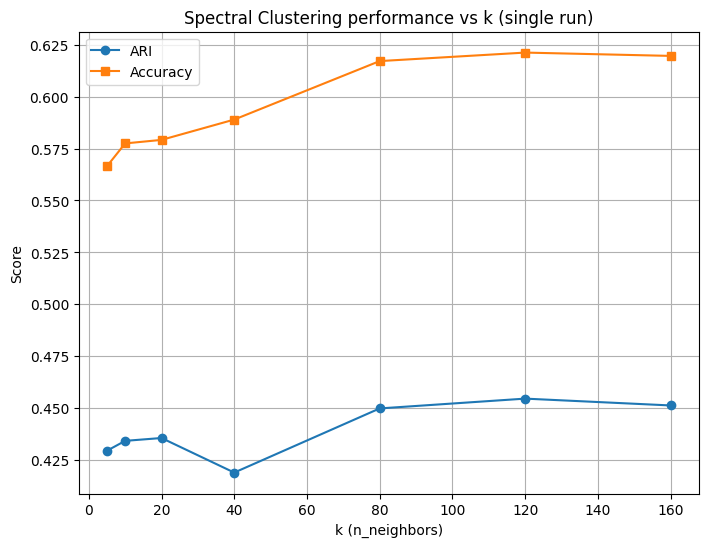

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from scipy.optimize import linear_sum_assignment

ks_to_try = [5, 10, 20, 40, 80, 120]
results = {}

for k in ks_to_try:
    model = SpectralClustering(
        n_clusters=10,
        affinity='nearest_neighbors',
        n_neighbors=k,
        assign_labels='kmeans',
        random_state=42,
        n_jobs=1
    )
    labels = model.fit_predict(X_reduced)

    # --- align labels ---
    cm = confusion_matrix(y_sub, labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    labels_aligned = np.zeros_like(labels)
    for i, j in zip(col_ind, row_ind):
        labels_aligned[labels == i] = j

    cm_aligned = confusion_matrix(y_sub, labels_aligned)

    # ARI
    ari = adjusted_rand_score(y_sub, labels_aligned)

    # Accuracy
    acc = np.trace(cm_aligned) / np.sum(cm_aligned)

    results[k] = {'ari': ari, 'acc': acc}
    print(f"k={k:3d} | ARI={ari:.4f}, Acc={acc:.4f}")

# --- plot ---
ks = list(results.keys())
ari_vals = [results[k]['ari'] for k in ks]
acc_vals = [results[k]['acc'] for k in ks]

plt.figure(figsize=(8,6))
plt.plot(ks, ari_vals, 'o-', label='ARI')
plt.plot(ks, acc_vals, 's-', label='Accuracy')
plt.xlabel("k (n_neighbors)")
plt.ylabel("Score")
plt.title("Spectral Clustering performance vs k (single run)")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, adjusted_rand_score
from scipy.optimize import linear_sum_assignment

def evaluate_clustering(y_true, labels, X_reduced, title=""):
    # --- Align labels with Hungarian algorithm ---
    cm = confusion_matrix(y_true, labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    labels_aligned = np.zeros_like(labels)
    for i, j in zip(col_ind, row_ind):
        labels_aligned[labels == i] = j

    cm_aligned = confusion_matrix(y_true, labels_aligned)
    ari = adjusted_rand_score(y_true, labels_aligned)
    acc = np.trace(cm_aligned) / np.sum(cm_aligned)

    print(f"{title} ARI: {ari:.4f}, Accuracy: {acc:.4f}")

    # --- Plot confusion matrix ---
    plt.figure(figsize=(6,5))
    plt.imshow(cm_aligned, cmap='Blues')
    plt.colorbar()
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.xticks(range(10))
    plt.yticks(range(10))
    for i in range(10):
        for j in range(10):
            plt.text(j, i, cm_aligned[i, j], ha='center', va='center', color='red', fontsize=6)
    plt.tight_layout()
    plt.show()

    # --- 2D visualization using first two components ---
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(X_reduced[:,0], X_reduced[:,1],
                          c=labels_aligned, cmap='tab10', s=5, alpha=0.7)
    plt.colorbar(scatter, ticks=range(10))
    plt.title(f"{title}")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.tight_layout()
    plt.show()

    return ari, acc


Spectral (kNN, k=120) ARI: 0.4544, Accuracy: 0.6213


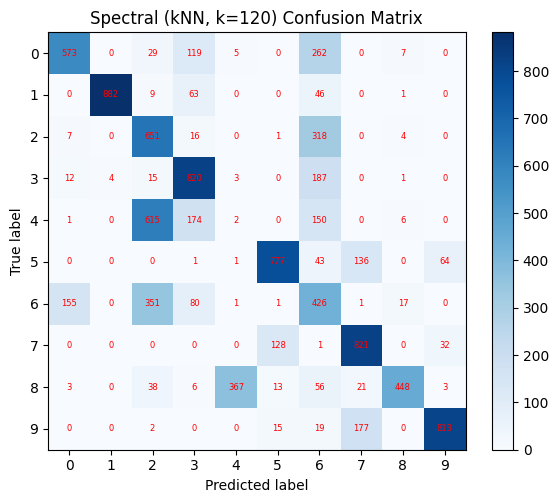

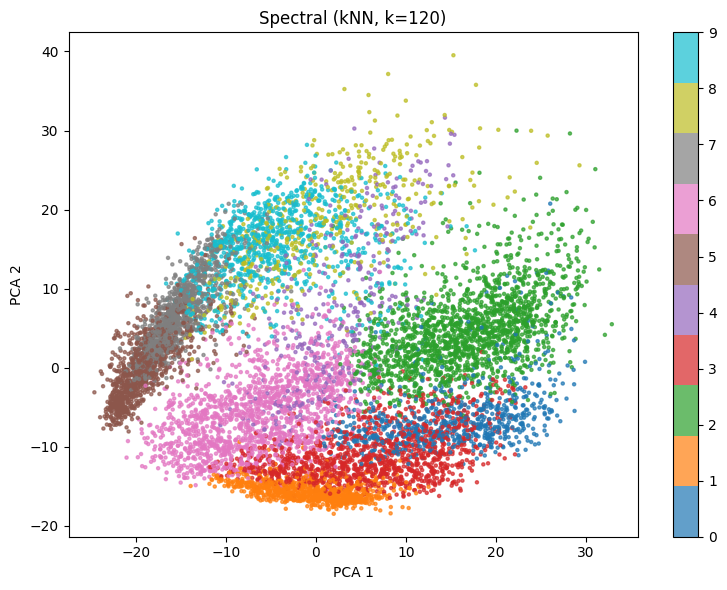

kMeans ARI: 0.3332, Accuracy: 0.4924


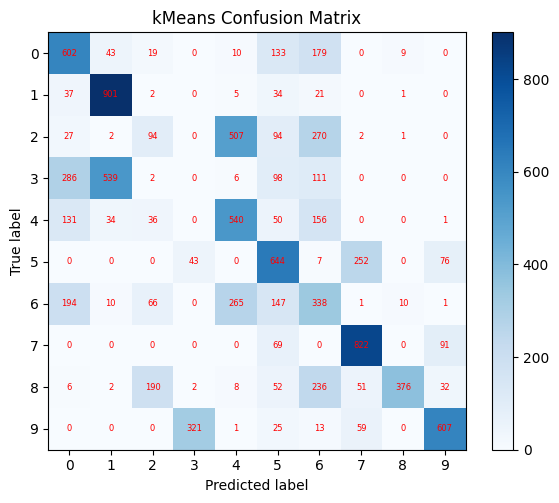

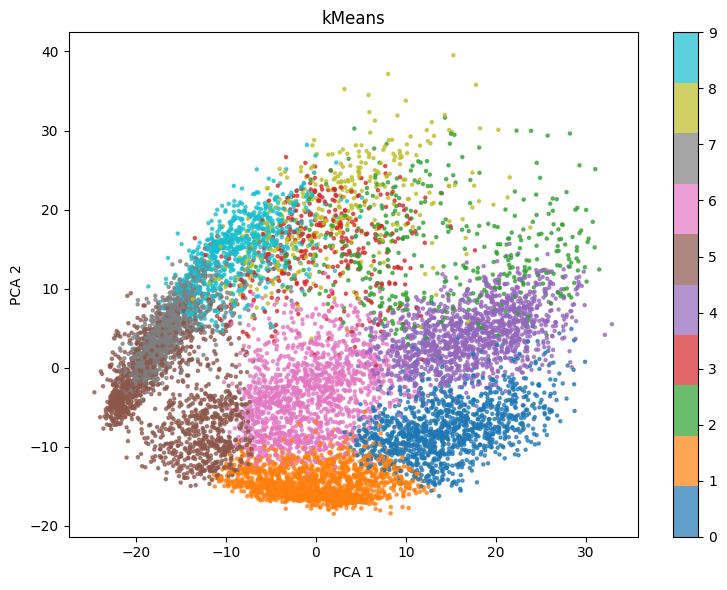

Summary of ARI & Accuracy:
kNN (k=120)  -> ARI: 0.4544, Accuracy: 0.6213
kMeans       -> ARI: 0.3332, Accuracy: 0.4924


In [13]:

results = {}

spectral = SpectralClustering(
        n_clusters=10,
        affinity='nearest_neighbors',
        n_neighbors=120,
        assign_labels='kmeans',
        random_state=42,
        n_init=10
        )
y_pred = spectral.fit_predict(X_reduced)





results[f"kNN (k=120)"] = evaluate_clustering(y_sub, y_pred, title=f"Spectral (kNN, k=120)", X_reduced=X_reduced)

kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(X_reduced)
y_pred = kmeans.fit_predict(X_reduced)

results[f"kMeans"] = evaluate_clustering(y_sub, y_pred, title=f"kMeans", X_reduced=X_reduced)




print("Summary of ARI & Accuracy:")
for k, (ari, acc) in results.items():
    print(f"{k:12s} -> ARI: {ari:.4f}, Accuracy: {acc:.4f}")



True ARI: 1.0000, Accuracy: 1.0000


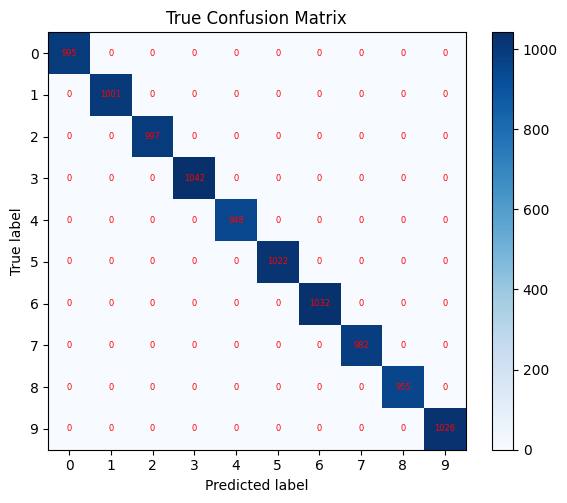

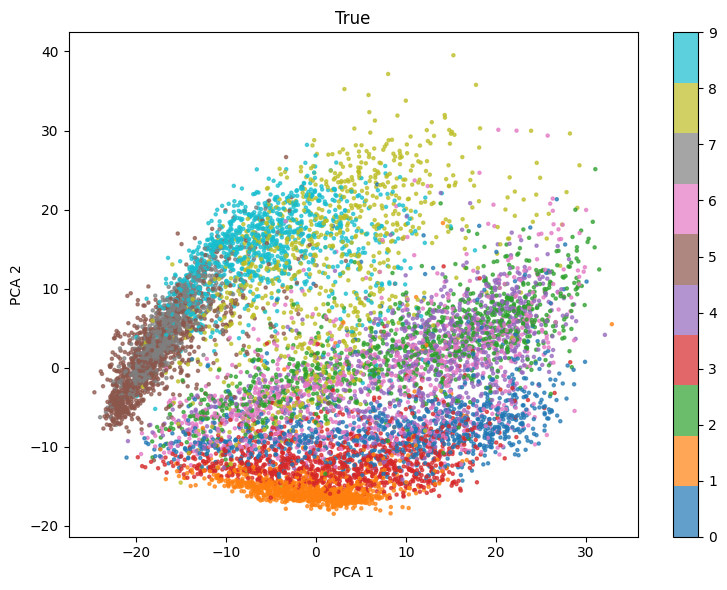

(1.0, np.float64(1.0))

In [14]:
# True

evaluate_clustering(y_sub, y_sub, title=f"True", X_reduced=X_reduced)